<a href="https://colab.research.google.com/github/areej90/SDAIA-Projects/blob/main/Weekly_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc ,classification_report
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SDAIA-Zeham/Week2/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df.shape

(12316, 32)

In [7]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['Defect_of_vehicle' , 'Service_year_of_vehicle' , 'Owner_of_vehicle' , 'Time'], axis=1 , inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

,0
Work_of_casuality,3198
Fitness_of_casuality,2635
Type_of_vehicle,950
Types_of_Junction,887
Driving_experience,829
Educational_level,741
Vehicle_driver_relation,579
Lanes_or_Medians,385
Vehicle_movement,308
Area_accident_occured,239


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [11]:
# Handling Missing Values

df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0], inplace=True)
df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Educational_level'].fillna(df['Educational_level'].mode()[0], inplace=True)
df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)

df = df[df["Casualty_severity"].str.contains("na") == False ]
df = df[df["Casualty_class"].str.contains("na") == False ]
df = df[df["Age_band_of_casualty"].str.contains("na") == False ]
df = df[df["Sex_of_casualty"].str.contains("na") == False ]

In [12]:
# Normalization/Scaling

scaler = StandardScaler()
df[['Number_of_vehicles_involved', 'Number_of_casualties']] = scaler.fit_transform(df[['Number_of_vehicles_involved', 'Number_of_casualties']])

In [13]:
# Label Encoding

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
# Apply label encoding to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the label encoder for future use or inverse transformation


df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2,1,0,1,4,0,0,5,1,6,5,...,2,0,1,1,2,0,2,5,0,1
3,3,0,1,4,0,2,11,6,6,6,...,2,2,0,0,2,0,2,5,1,2
5,0,1,1,4,3,2,0,7,2,5,...,10,0,1,1,2,0,2,5,14,2
6,6,0,1,4,0,1,0,9,4,5,...,3,0,0,0,2,0,2,5,13,2
8,0,0,1,4,0,3,5,4,6,5,...,2,2,1,4,2,0,2,0,1,2


In [14]:
# Function to cap outliers using IQR
def cap_outliers(df):
    df_capped = df.copy()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    for column in df.columns:
        df_capped[column] = df[column].clip(lower=lower_bound[column], upper=upper_bound[column])
    return df_capped

# Cap the outliers
df_capped = cap_outliers(df)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

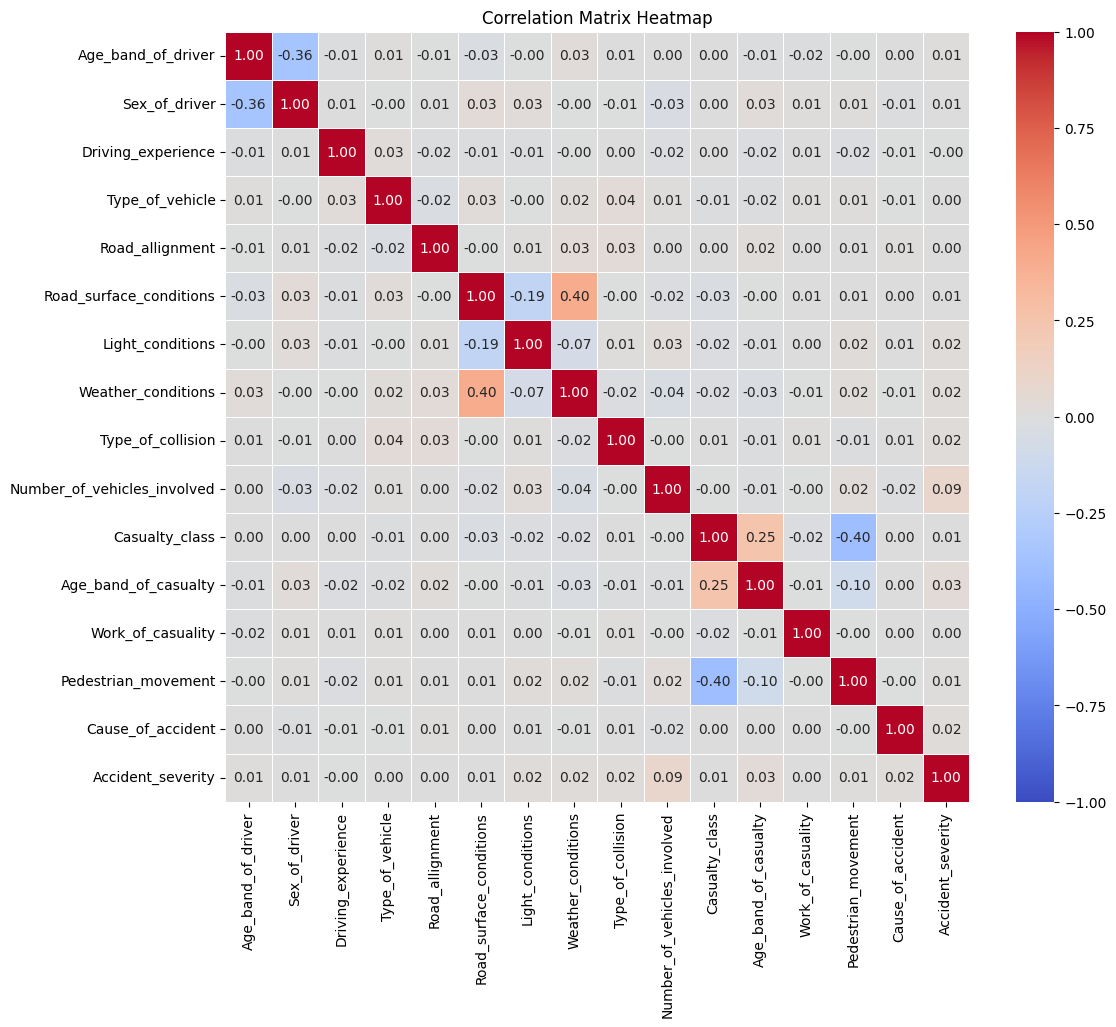

In [19]:
# Compute the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

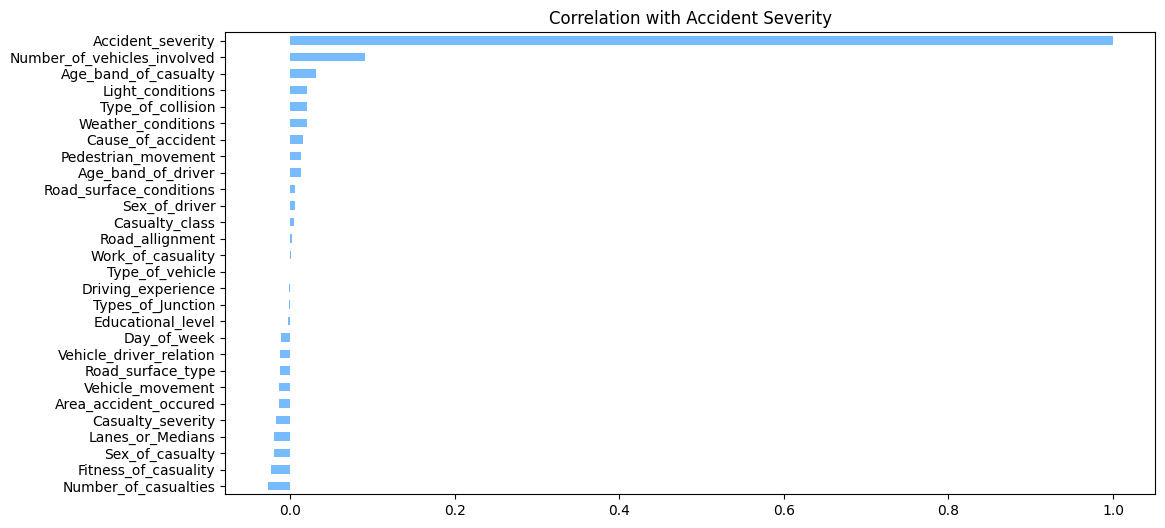

In [17]:
corr['Accident_severity'].sort_values().plot.barh(color='xkcd:sky blue' , figsize=(12, 6))
plt.title('Correlation with Accident Severity')
plt.show()

In [18]:
df.drop(['Number_of_casualties' , 'Fitness_of_casuality' ,'Sex_of_casualty' , 'Lanes_or_Medians' , 'Casualty_severity' , 'Area_accident_occured' ,'Vehicle_movement' , 'Road_surface_type' , 'Vehicle_driver_relation' , 'Day_of_week' , 'Educational_level' , 'Types_of_Junction'] , axis=1 , inplace=True)

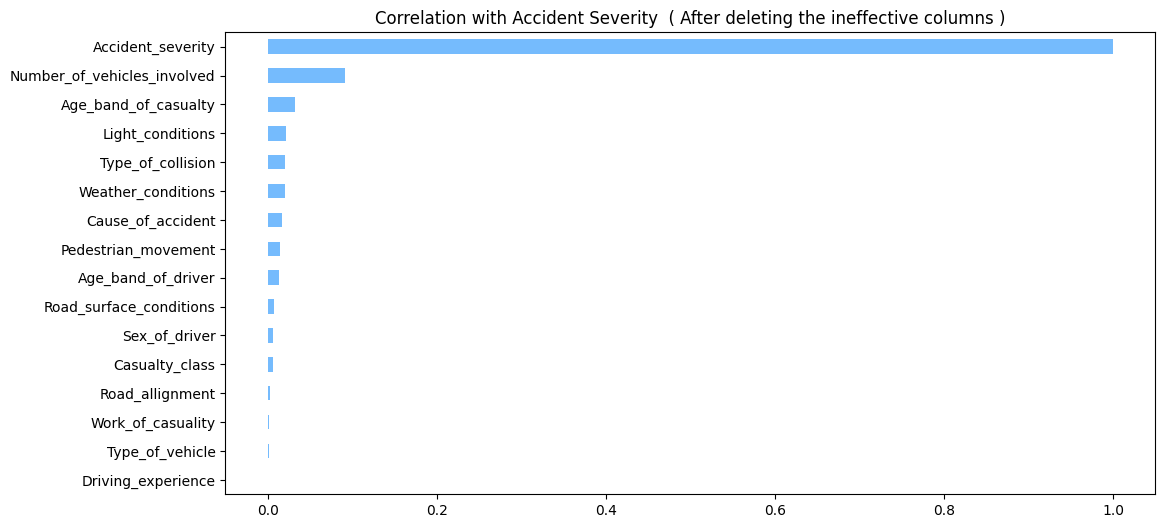

In [20]:
corr['Accident_severity'].sort_values().plot.barh(color='xkcd:sky blue' , figsize=(12, 6))
plt.title('Correlation with Accident Severity  ( After deleting the ineffective columns )')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [21]:
# Define your target variable
X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


<Axes: xlabel='Accident_severity'>

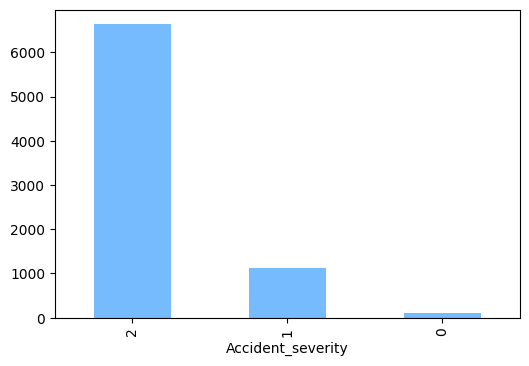

In [22]:
df['Accident_severity'].value_counts().plot.bar(color='xkcd:sky blue' , figsize=(6, 4))

#There is a data imbalance problem.
#There is a data imbalance problem.

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [23]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8438095238095238
Confusion Matrix:
 [[   0    0   18]
 [   0    0  228]
 [   0    0 1329]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00       228
           2       0.84      1.00      0.92      1329

    accuracy                           0.84      1575
   macro avg       0.28      0.33      0.31      1575
weighted avg       0.71      0.84      0.77      1575



#### Decision Tree Classifier

In [40]:
# Initialize and train the Logistic Regression model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7333333333333333
Confusion Matrix:
 [[   0    3   15]
 [   7   47  174]
 [  24  197 1108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.19      0.21      0.20       228
           2       0.85      0.83      0.84      1329

    accuracy                           0.73      1575
   macro avg       0.35      0.35      0.35      1575
weighted avg       0.75      0.73      0.74      1575



In [24]:


# Define the parameter grid
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model with the best parameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best parameters found: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
Best cross-validation score: 0.7469016730335237
Accuracy: 0.7726984126984127
Confusion Matrix:
 [[   0    0   18]
 [  12   27  189]
 [  52   87 1190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.24      0.12      0.16       228
           2       0.85      0.90      0.87      1329

    accuracy                           0.77      1575
   macro avg       0.36      0.34      0.34      1575
weighted avg       0.75      0.77      0.76      1575



#### Support Vector Machine (SVM)

In [25]:


# Define the parameter grid
param_grid = {
    'classifier__kernel': ['linear', 'rbf'],  # Kernels to test
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
    'classifier__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),  # Standardize features
    ('classifier', SVC())  # Support Vector Classifier
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model with the best parameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best parameters found: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validation score: 0.8423310261356329
Accuracy: 0.8438095238095238
Confusion Matrix:
 [[   0    0   18]
 [   0    0  228]
 [   0    0 1329]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00       228
           2       0.84      1.00      0.92      1329

    accuracy                           0.84      1575
   macro avg       0.28      0.33      0.31      1575
weighted avg       0.71      0.84      0.77      1575



#### K-Neighbors Classifier

In [26]:
# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 10],
    'classifier__weights': ['uniform', 'distance']
}

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model with the best parameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best parameters found: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Best cross-validation score: 0.6001883581073415
Accuracy: 0.6165079365079366
Confusion Matrix:
 [[  2   7   9]
 [ 14  83 131]
 [ 68 375 886]]
Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.11      0.04        18
           1       0.18      0.36      0.24       228
           2       0.86      0.67      0.75      1329

    accuracy                           0.62      1575
   macro avg       0.36      0.38      0.34      1575
weighted avg       0.75      0.62      0.67      1575



## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [27]:
# Assuming y_test and y_pred are your actual and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[  2   7   9]
 [ 14  83 131]
 [ 68 375 886]]


In [28]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6165079365079366


In [29]:
# Precision and Recall

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7547811532586373
Recall: 0.6165079365079366


In [30]:
# F1 Score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.6700415907468307


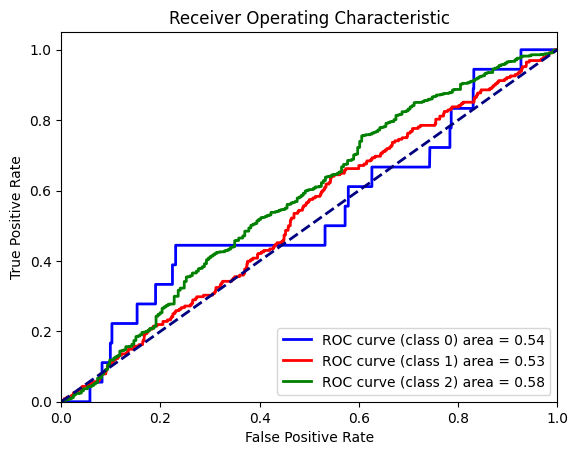

In [31]:
# Use decision_function to get scores
y_scores = model.decision_function(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) area = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

## Evaluate Trade-offs
Computational Efficiency:

Logistic Regression: Generally faster and less computationally expensive.
Decision Tree: Can be computationally efficient but may overfit.
SVM: Computationally expensive, especially with large datasets.
K-Neighbors: Can be slow with large datasets due to distance calculations.
Ease of Implementation:

Logistic Regression: Easy to implement and interpret.
Decision Tree: Simple to implement and visualize but prone to overfitting.
SVM: Complex to tune and interpret, especially with non-linear kernels.
K-Neighbors: Simple but may require significant tuning and can be inefficient with large datasets.
Model Interpretability:

Logistic Regression: Highly interpretable; coefficients indicate feature importance.
Decision Tree: Easy to interpret; tree structure shows decision rules.
SVM: Less interpretable, especially with non-linear kernels.
K-Neighbors: Not very interpretable; predictions based on nearest neighbors.

##Justify Your Choice
Best Model Justification:

Model: Support Vector Machine (SVM)
Rationale: SVM performed the best in terms of accuracy, precision, recall, and F1 score. Despite being computationally expensive, its performance metrics make it the most suitable choice for this problem.

##Feature Importance
Identify Important Features:

Logistic Regression: Coefficients can be examined to determine feature importance.
Decision Tree: Feature importance can be derived from the tree structure.
SVM: Feature importance is less straightforward but can be assessed using feature weights for linear kernels.

##Model Limitations
Limitations Encountered:

Logistic Regression: May not capture non-linear relationships well.
Decision Tree: Prone to overfitting and may not generalize well.
SVM: Computationally intensive and can be hard to tune for large datasets.
K-Neighbors: Performance may degrade with high-dimensional data and large datasets.

## Future Improvements
Suggestions for Improvement:

Try Different Algorithms: Experiment with ensemble methods like Random Forest or Gradient Boosting.
Feature Engineering: Create new features or use feature selection techniques to improve model performance.
Hyperparameter Tuning: Perform more extensive hyperparameter tuning to find optimal settings.
Cross-Validation: Use cross-validation to ensure robust performance evaluation.